## Visualize an example simulation as it moves towards equilibrium

In [1]:
import numpy as np
import pandas as pd
import os

from lib.plotting import *
from lib.response import *
from lib.preferences import *

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as patches
import seaborn as sns

import matplotlib.gridspec as gridspec

# inline stylization
%matplotlib inline
sns.set_style("ticks")
sns.set_style("white")

plt.rcParams["figure.dpi"] = 100
plt.rcParams["savefig.dpi"] = 150
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True

In [3]:
# Font sizes
plt.rc('font', size=12)         # controls default text sizes
plt.rc('axes', titlesize=14)    # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize

## Preferences

In [4]:
analysis_metrics = ["HX", "VX", 
                    'frac_mixed_samples','mean_k',
                    'n_segregating','pi','theta',
                    'avg_frac_ibd', 'avg_n_ibd','avg_l_ibd']

In [5]:
genetic_names.update({
    "mean_k": "C.O.I ($k$)",
    "pi": "Nucl. Diversity ($\pi$)",
    "avg_l_ibd": "Avg. IBD\nTrack Length (bp)"
})

In [6]:
savefig = True

## Load Simulation

### Individual

In [7]:
sim_ix = 3
expt = "bed"
temp = "../results/2020-06-07_intv-%s"

In [8]:
expt_path = temp % expt
sim_complete = [s for s in os.listdir(expt_path) 
                if "Endpoint" in os.listdir(os.path.join(expt_path, s))]
n_sims = len(sim_complete)
sim = sim_complete[sim_ix]

In [9]:
# Load full data frame
epoch_df = pd.read_csv(os.path.join(expt_path, sim, "epoch_df.csv"))
epoch_df.index = epoch_df.name
og = pd.read_csv(os.path.join(expt_path, sim, "og.csv"))
op = pd.read_csv(os.path.join(expt_path, sim, "op.csv"))

# Merge on time
ot = pd.merge(left=op, right=og, on="t0")

In [10]:
epoch_df

,name,t0,t1,gen_rate,gens,x_h,x_v
name,,,,,,,
init,init,0.000000,107230.769231,531.529915,5.699636e+07,0.653846,0.075556
InitVar,InitVar,107230.769231,116355.769231,531.529915,4.850210e+06,0.653846,0.075556
Crash,Crash,116355.769231,152855.769231,325.412814,1.187757e+07,0.200002,0.015687
CrashVar,CrashVar,152855.769231,161980.769231,325.412814,2.969392e+06,0.200002,0.015687
Recovery,Recovery,161980.769231,269211.538462,531.529915,5.699636e+07,0.653846,0.075556


In [11]:
time_limits = (epoch_df.loc["InitVar", "t0"], epoch_df.loc["Recovery", "t0"] + 75*365)

## Plot

### Prevalence

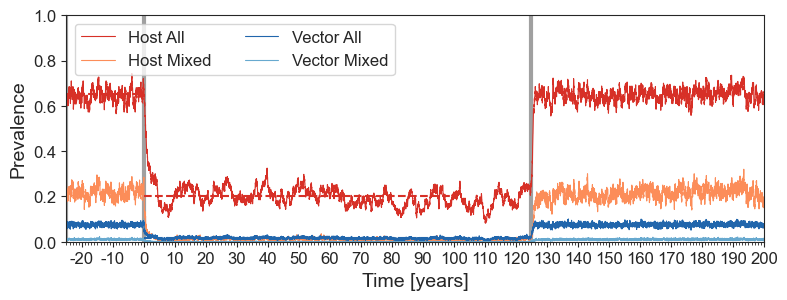

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(9, 3))

prevalence_trajectory_plot(ot, epoch_df, ax,
                           col_dt=prevalence_col_dt,
                           norm_t0=("Crash", "t0"),
                           indicate_epochs=[("Crash", "t0"), ("InitVar", "t0"), ("CrashVar", "t1")],
                           indicate_equilibriums=["InitVar", "Crash"],
                           time_limits=time_limits,
                           years_per_major_tick=10)

ax.set_xlabel("Time [years]")
ax.set_ylabel("Prevalence")
ax.legend(loc="upper left", ncol=2)

if savefig:
    fig.savefig("../figs/sec3_traj-prevalence-sm-%s-%02d.png" % (expt, sim_ix), 
                bbox_inches="tight", pad_inches=0.5)
    fig.savefig("../figs/sec3_traj-prevalence-sm-%s-%02d.pdf" % (expt, sim_ix),  
                bbox_inches="tight", pad_inches=0.5)

### Genetics

In [13]:
metrics = tight_metrics
n_metrics = len(metrics)

In [14]:
genetic_names.update({"avg_l_ibd": "Avg. IBD Track Length (bp)"})

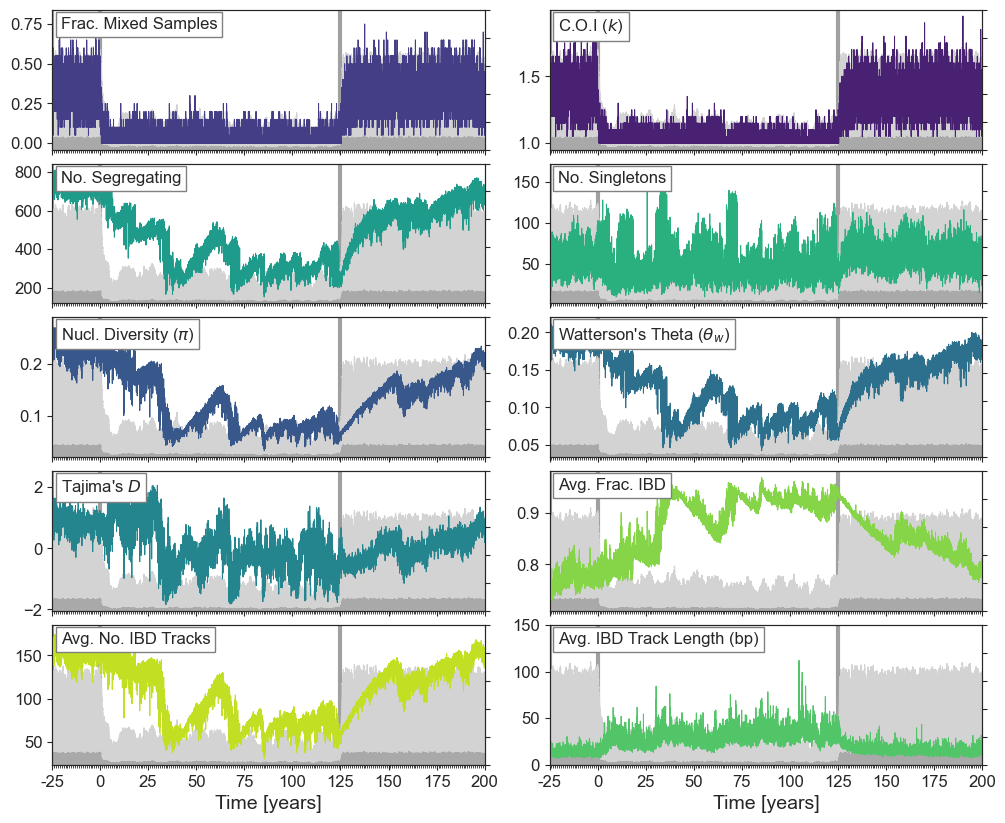

In [15]:
fig, axes = plt.subplots(int(n_metrics/2), 2, figsize=(12, 10), sharex=True)
fig.subplots_adjust(hspace=0.1, wspace=0.15)

for ax, metric in zip(axes.flatten(), metrics):
    
    # Raw
    genetic_trajectory_plot(metric, ot, epoch_df,
                            tight_metric_col_dt[metric], ax,
                           norm_t0=("Crash", "t0"),
                           indicate_epochs=[("Crash", "t0"), ("InitVar", "t0"), ("CrashVar", "t1")],
                           time_limits=time_limits,
                           years_per_major_tick=25)
    
    if metric == "avg_l_ibd":
        ax.set_ylim((0, 150))
        
    if metric in ["avg_n_ibd", "avg_l_ibd"]:
        ax.set_xlabel("Time [years]")

    # y
    #ax.set_ylabel(genetic_names[metric], fontsize=12)
    #ax.set_title(genetic_names[metric], fontsize=12, loc="left")
    ax.annotate(s=genetic_names[metric], xy=(0.02, 0.95), xycoords="axes fraction", 
                ha="left", va="top",
                bbox=dict(boxstyle="square", fc="white", ec="grey", lw=1))
    
if savefig:
    fig.savefig("../figs/sec3_traj-genetics-sm-%s-%02d.png" % (expt, sim_ix), 
                bbox_inches="tight", pad_inches=0.5)
    fig.savefig("../figs/sec3_traj-genetics-sm-%s-%02d.pdf" % (expt, sim_ix),  
                bbox_inches="tight", pad_inches=0.5)

I think one of these for each intervention type would be okay...